In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from darts import TimeSeries
from darts.models import TBATS
from darts.metrics import mape

# TBATS DIARIO

In [2]:
#cargame los pickle y_test_diario y Y_train_diario
y_test_diario = pd.read_pickle('y_test_diario.pkl')
y_train_diario = pd.read_pickle('y_train_diario.pkl')

y_diario = pd.concat([y_train_diario, y_test_diario])
y_diario.head()

,Visitantes totales
fecha,
2013-01-01,2338
2013-01-02,9376
2013-01-03,9190
2013-01-04,9523
2013-01-05,5492


In [3]:
#Lo pasamos a TimeSeries para trabajar con darts
ts_y_diario = TimeSeries.from_series(y_diario['Visitantes totales'], freq='D') #freq='D' es para que tome los datos como diarios

<Axes: xlabel='fecha'>

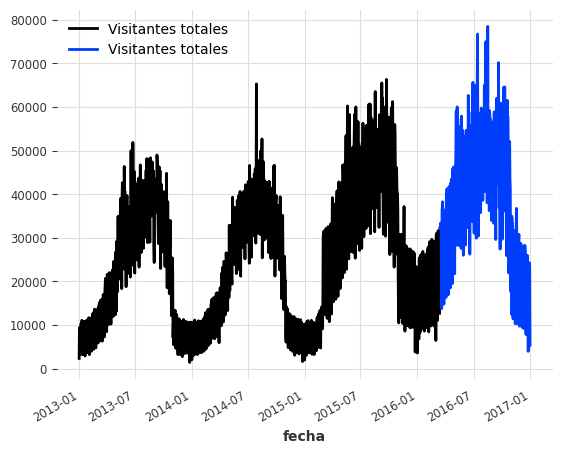

In [4]:
# Dividimos en train y test
train, test = ts_y_diario.split_before(0.80)
train.plot()
test.plot()

In [5]:
#Elaboramos el modelo
model_diario =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods=(7,365), # Estacionalidad diaria y anual (se pueden poner más)
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)

#Lo entrenamos
model_diario.fit(train)


TBATS(use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, seasonal_periods=(7, 365), use_arma_errors=True, show_warnings=False, n_jobs=None, multiprocessing_start_method=spawn, random_state=0)

In [6]:
#Hacemos la predicion
forecast = model_diario.predict(len(test))
print("model {} obtains MAPE: {:.2f}%".format(model_diario, mape(test, forecast)))




model TBATS(seasonal_periods=(7, 365)) obtains MAPE: 14.60%


<Axes: xlabel='fecha'>

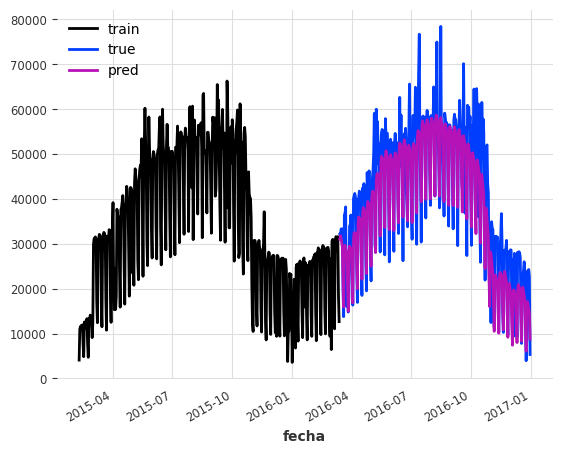

In [7]:
#Observamos resultados
train[-400:].plot(label="train")
test.plot(label="true")
forecast.plot(label="pred")

In [8]:
# PREDICCION ENERO

In [9]:
#concatename test y train en un solo dataframe
y_diario_def = pd.concat([y_train_diario, y_test_diario])
y_diario_def.head()

,Visitantes totales
fecha,
2013-01-01,2338
2013-01-02,9376
2013-01-03,9190
2013-01-04,9523
2013-01-05,5492


In [10]:
#Entrenamos
model_diario.fit(ts_y_diario)

TBATS(use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, seasonal_periods=(7, 365), use_arma_errors=True, show_warnings=False, n_jobs=None, multiprocessing_start_method=spawn, random_state=0)

In [11]:
#Predecimos
y_pred_enero = model_diario.predict(31)

<Axes: xlabel='fecha'>

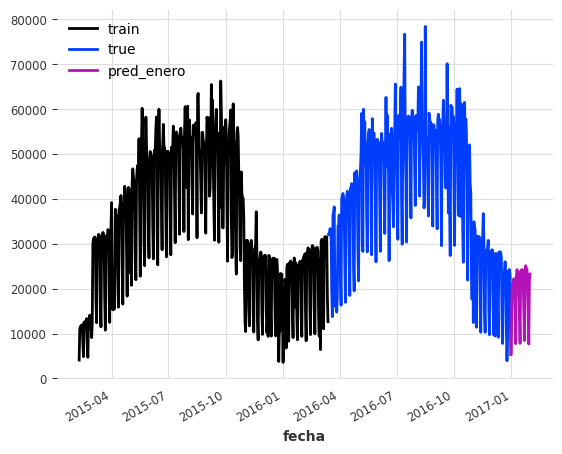

In [12]:

#Observamos resultados

train[-400:].plot(label="train")
test.plot(label="true")
y_pred_enero.plot(label="pred_enero")

# TBATS SEMANAL

In [13]:
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')

y_semanal = pd.concat([y_train_semanal, y_test_semanal])
y_semanal.head()

,Visitantes totales
2013-01-06,39175
2013-01-13,62527
2013-01-20,59026
2013-01-27,57169
2013-02-03,62514


In [14]:
from darts import TimeSeries
# Convertir a TimeSeries de Darts
ts_y_semanal = TimeSeries.from_series(y_semanal['Visitantes totales'], freq='W')

<Axes: xlabel='time'>

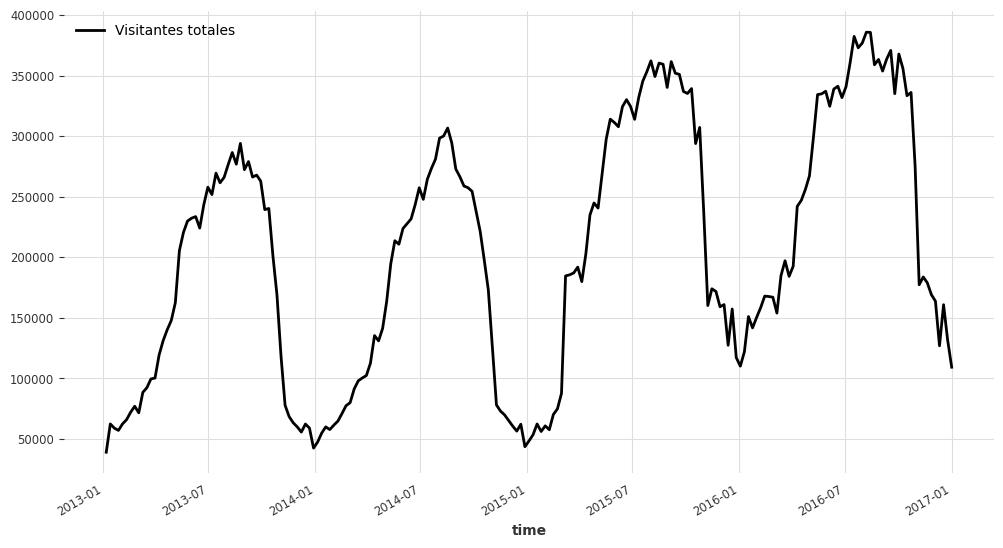

In [15]:
plt.rcParams["figure.figsize"] = (12,6)
ts_y_semanal.plot()

<Axes: xlabel='time'>

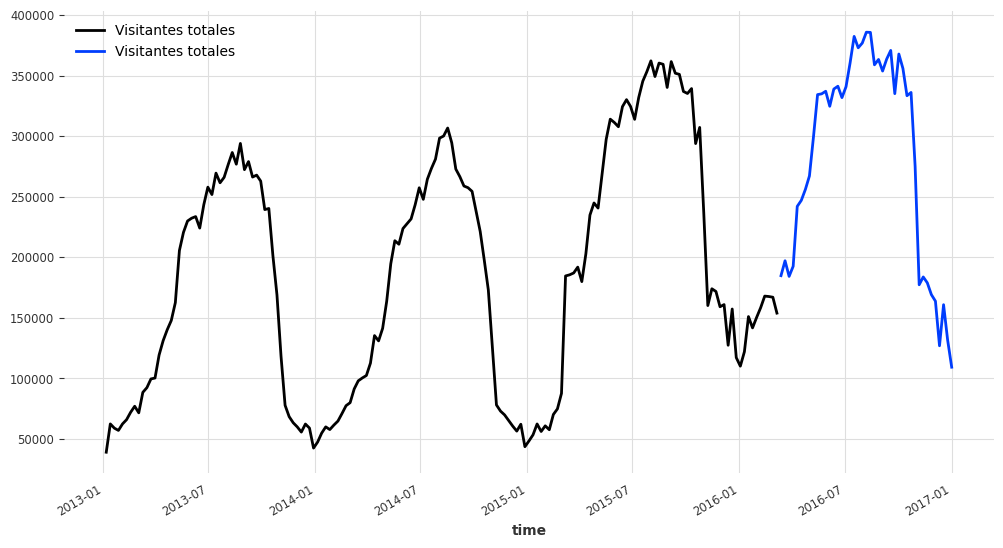

In [16]:
#Dividimos en train y test 80/20
train, val = ts_y_semanal.split_before(0.80)
train.plot()
val.plot()

In [17]:
#Modelamos y entrnamos
from darts.models import TBATS
from darts.metrics import mape


model =TBATS(
use_box_cox=None,
box_cox_bounds=(0, 1),
use_trend=None,
use_damped_trend=None,
seasonal_periods=[52],
use_arma_errors=True,
show_warnings=False,
multiprocessing_start_method='spawn',
random_state=0)
model.fit(train)



TBATS(use_box_cox=None, box_cox_bounds=(0, 1), use_trend=None, use_damped_trend=None, seasonal_periods=[52], use_arma_errors=True, show_warnings=False, n_jobs=None, multiprocessing_start_method=spawn, random_state=0)

In [18]:
forecast_semanal = model.predict(len(val))
print("model {} obtains MAPE: {:.2f}%".format(model, mape(val, forecast)))


model TBATS(seasonal_periods=[52]) obtains MAPE: 91.18%


In [19]:
model.model.params.summary()

'Use Box-Cox: False\nUse trend: False\nUse damped trend: False\nSeasonal periods: [52.]\nSeasonal harmonics [22]\nARMA errors (p, q): (0, 0)\nSmoothing (Alpha): 0.685374\nSeasonal Parameters (Gamma): [-0.00051279  0.00773051]\nAR coefficients []\nMA coefficients []\nSeed vector [ 1.66158234e+05 -1.17439618e+05 -1.58308686e+04  6.78907097e+03\n  3.86923526e+03  6.61555445e+03 -4.87222082e+03 -6.03876800e+03\n -1.31035779e+03 -5.97733730e+02  2.18085484e+03  1.99832569e+03\n -3.69943271e+03 -2.83436621e+03 -1.98516981e+03 -2.47751524e+02\n  3.57414961e+02  1.48274499e+03 -1.72728161e+03 -9.70131283e+02\n -2.50939898e+03  1.35171182e+03  1.63712333e+03 -4.00870238e+04\n  1.45981468e+04  1.26170465e+04 -8.36398658e+02 -6.88693266e+03\n -6.81072931e+02  1.90959673e+03  1.81984633e+03  2.51924393e+03\n -1.58196244e+03  7.96715166e+01  3.91018426e+02 -1.28404996e+02\n  3.71529743e+02  1.83405091e+03  4.21041032e+02 -6.91945611e+02\n  6.19832781e+02 -2.28568366e+02  1.46512238e+03  1.83844959e

<Axes: xlabel='time'>

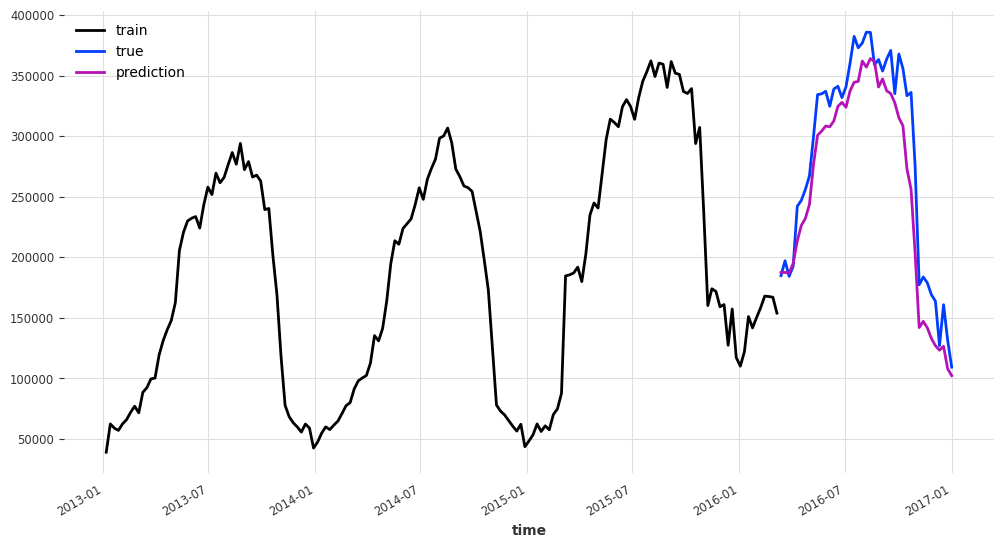

In [20]:
# visualizamos resultados
train.plot(label="train")
val.plot(label="true")
forecast_semanal.plot(label="prediction")

167 42


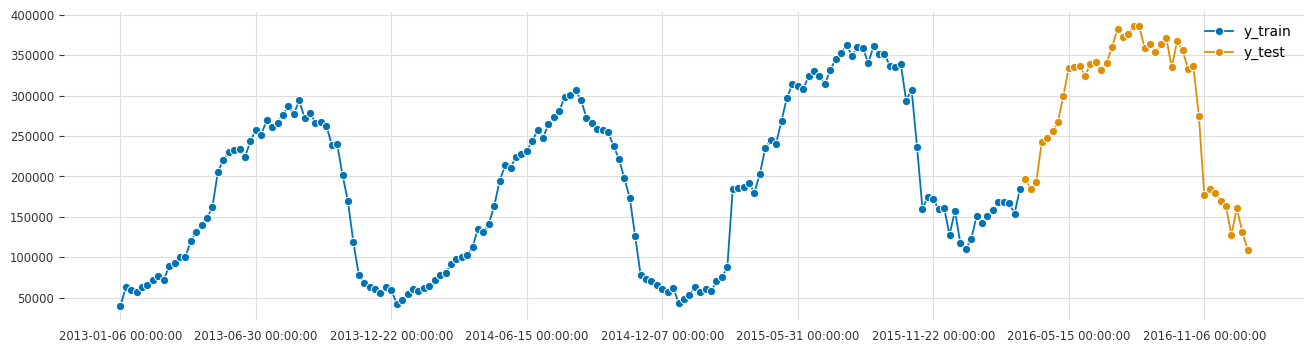

In [21]:
#Lo realizamos ahora cn sktime
from sktime.forecasting.tbats import TBATS # MODELO TBATS
from sktime.forecasting.base import ForecastingHorizon
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
#cargame los pickle y_test_semanal y Y_train_semanal
y_test_semanal = pd.read_pickle('y_test_semanal.pkl')
y_train_semanal = pd.read_pickle('y_train_semanal.pkl')
# we will try to forecast y_test from y_train
# plotting for illustration
plot_series(y_train_semanal, y_test_semanal, labels=["y_train", "y_test"])
print(y_train_semanal.shape[0], y_test_semanal.shape[0])

In [22]:
#Modelamos y entrenamos
model_semanal = TBATS(  
    use_box_cox=None, #Si pones None, el modelo lo calcula
    use_trend=None,
    use_damped_trend=None,
    sp=52,
    use_arma_errors=True,
    n_jobs=1)
model_semanal.fit(y_train_semanal)  
# TBATS(...)

TBATS(n_jobs=1, sp=52)

In [23]:
#Hacemos la prediccion de test
import numpy as np
y_pred_semanal = model_semanal.predict(fh=np.arange(len(y_test_semanal))+1) #Para predecir enero



(<Figure size 1600x400 with 1 Axes>, <Axes: >)

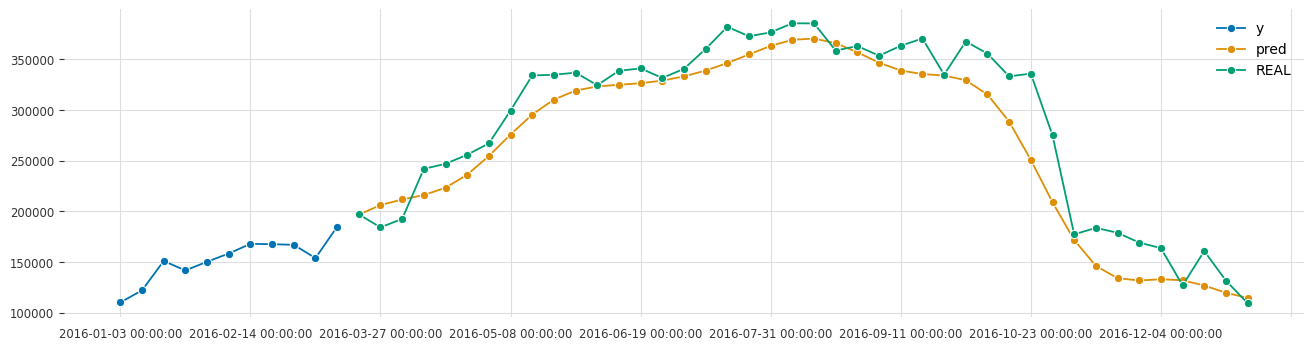

In [24]:
# optional: plotting predictions and past data
plot_series(y_train_semanal["2016":], y_pred_semanal,y_test_semanal, labels=["y", "pred", "REAL"])

In [25]:
#Evaluamos métricas
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanSquaredError
from sklearn.metrics import r2_score


# Calculando MAPE
mape_result = mean_absolute_percentage_error(y_test_semanal, y_pred_semanal)

# Calculando MSE
mse_result = MeanSquaredError()(y_test_semanal, y_pred_semanal)

# Calculando R2 score
r2_result = r2_score(y_test_semanal, y_pred_semanal)

print("MAPE:", mape_result)
print("MSE:", mse_result)
print("R2:", r2_result)


MAPE: 0.08699405969294809
MSE: 823804828.7123388
R2: 0.8876922167496226


In [26]:
import numpy as np

# Utiliza el modelo ya entrenado para predecir los próximos 4 puntos
num_next_points = 4
pred_enero = model_semanal.predict(fh=np.arange(len(y_test_semanal), len(y_test_semanal) + num_next_points))

# Imprime la predicción de los siguientes 4 puntos
print("Predicción de los próximos {} puntos:".format(num_next_points), pred_enero)


Predicción de los próximos 4 puntos:             Visitantes totales
2017-01-01       114691.060311
2017-01-08       115159.029260
2017-01-15       121256.573912
2017-01-22       130187.022248


(<Figure size 1600x400 with 1 Axes>, <Axes: >)

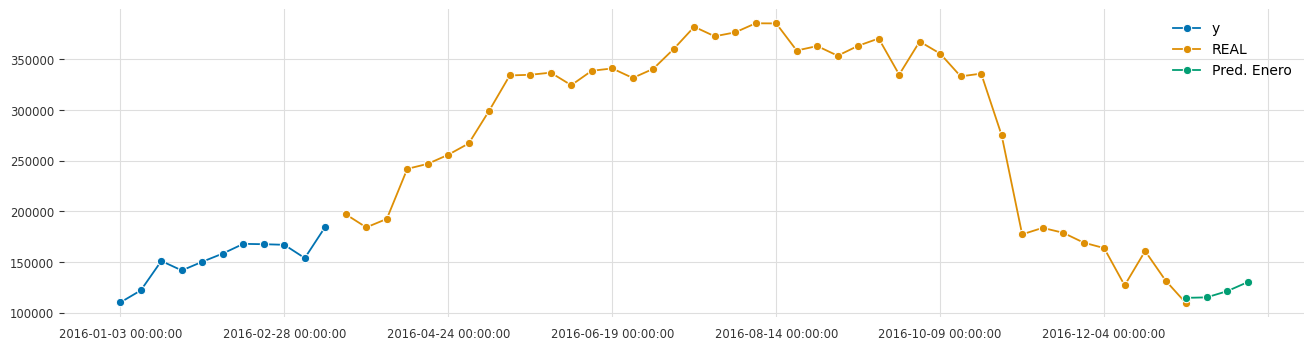

In [27]:
# optional: plotting predictions and past data
plot_series(y_train_semanal["2016":],y_test_semanal,pred_enero, labels=["y", "REAL", "Pred. Enero"])